In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [29]:
df = pd.read_csv("TMDb_updated.CSV")

In [30]:
df.head()

,index,title,overview,original_language,vote_count,vote_average
0,0,Ad Astra,"The near future, a time when both hope and har...",en,2853,5.9
1,1,Bloodshot,"After he and his wife are murdered, marine Ray...",en,1349,7.2
2,2,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,en,2530,7.1
3,3,Ant-Man,Armed with the astonishing ability to shrink i...,en,13611,7.1
4,4,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",en,3542,5.9


In [31]:
df.set_index("index",inplace = True)

In [32]:
df.head()

,title,overview,original_language,vote_count,vote_average
index,,,,,
0,Ad Astra,"The near future, a time when both hope and har...",en,2853,5.9
1,Bloodshot,"After he and his wife are murdered, marine Ray...",en,1349,7.2
2,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,en,2530,7.1
3,Ant-Man,Armed with the astonishing ability to shrink i...,en,13611,7.1
4,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",en,3542,5.9


In [38]:
df.sort_values(by = "vote_count",ascending = False, inplace = True)

In [39]:
df.dropna(inplace = True)

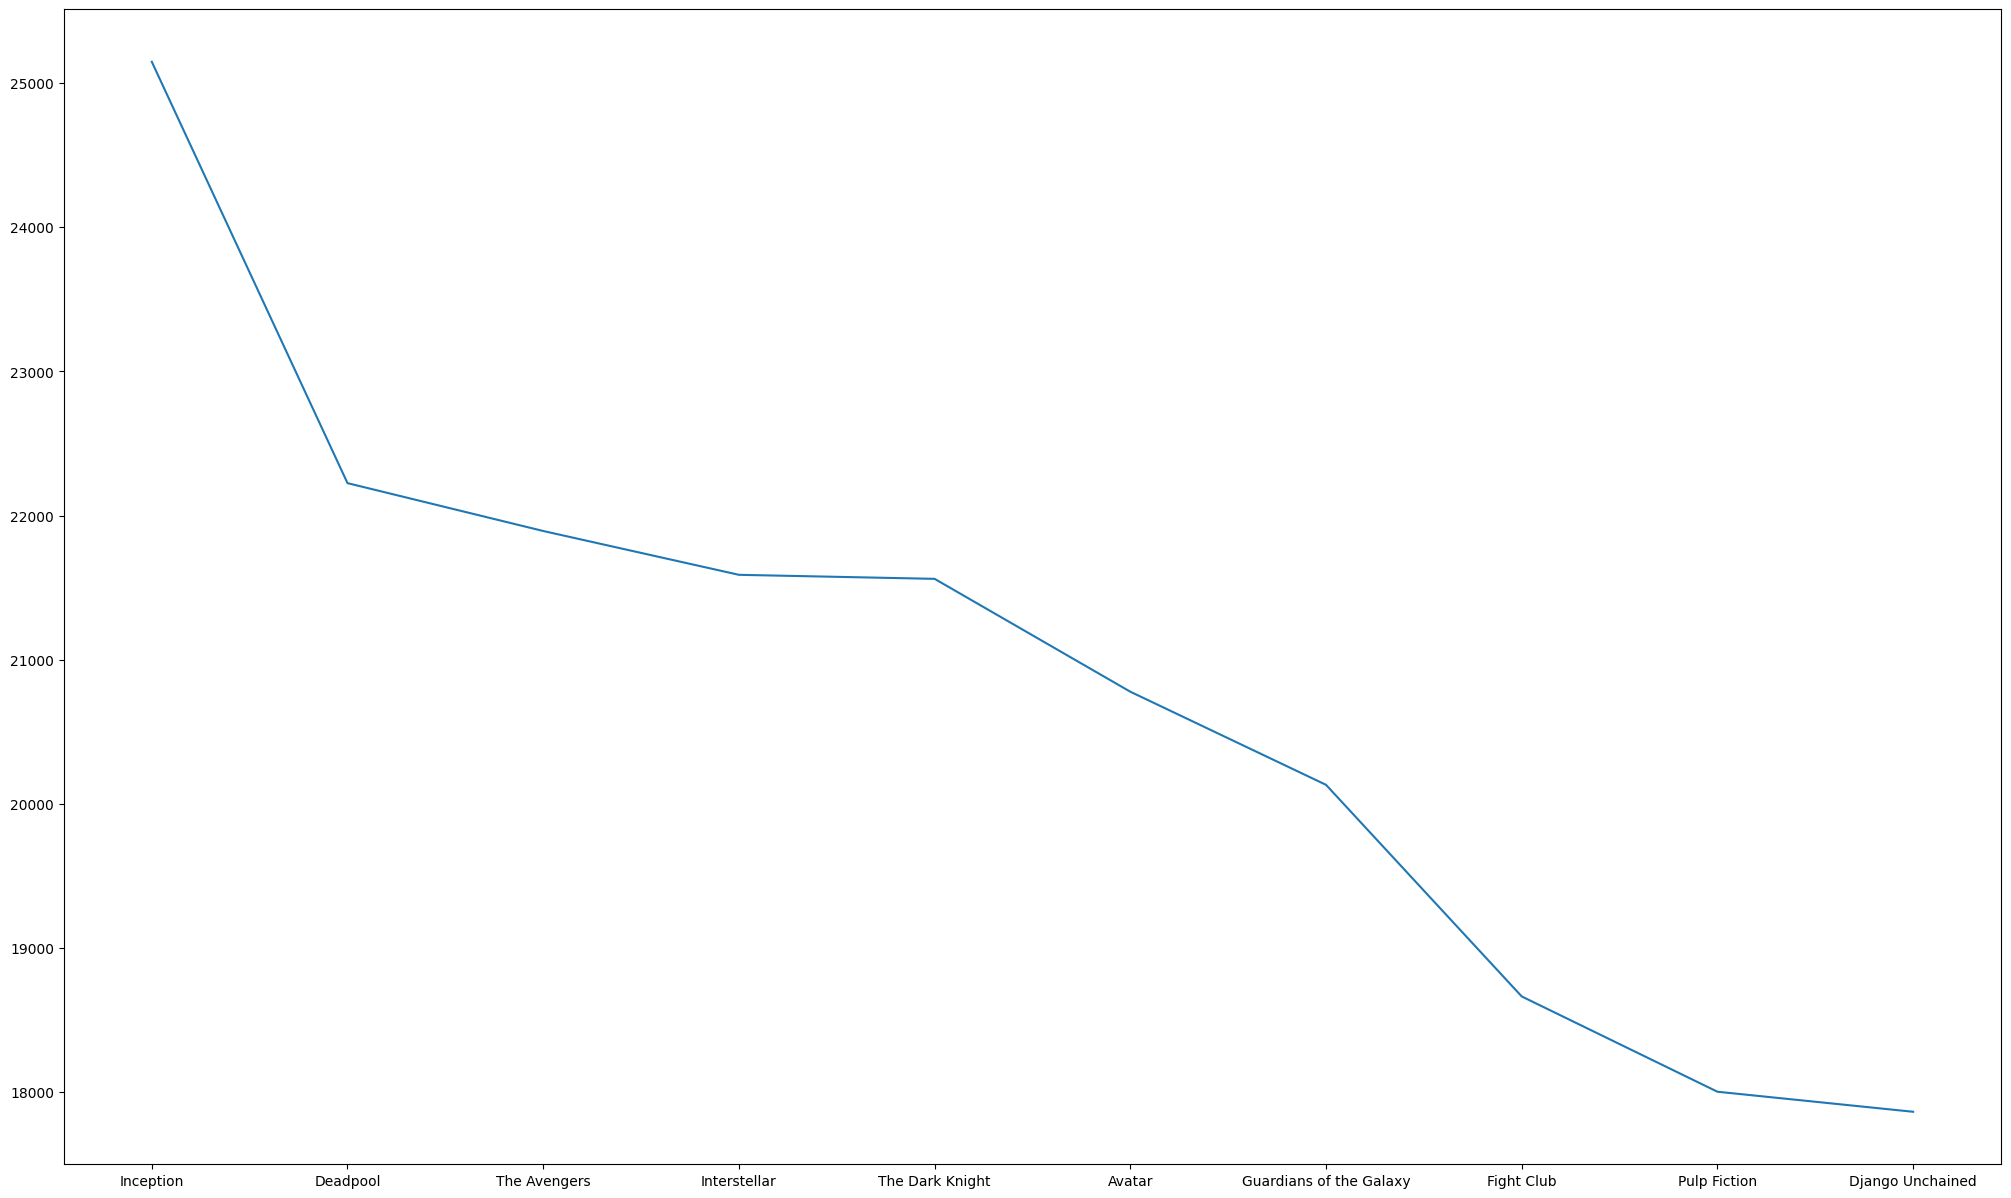

In [49]:
plt.figure(figsize = (25,15))
plt.plot(df["title"].head(10), df["vote_count"].head(10))
plt.show()

In [57]:
df["factor"] = df["vote_count"]*df["vote_average"]/(10**4+7)

In [58]:
df.head(10)

,title,overview,original_language,vote_count,vote_average,factor
index,,,,,,
80,Inception,"Cobb, a skilled thief who commits corporate es...",en,25148,8.3,20.858239
128,Deadpool,Deadpool tells the origin story of former Spec...,en,22225,7.6,16.879185
86,The Avengers,When an unexpected enemy emerges and threatens...,en,21893,7.7,16.845818
47,Interstellar,Interstellar chronicles the adventures of a gr...,en,21589,8.3,17.906336
88,The Dark Knight,Batman raises the stakes in his war on crime. ...,en,21561,8.4,18.098571
132,Avatar,"In the 22nd century, a paraplegic Marine is di...",en,20778,7.4,15.364965
402,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",en,20132,7.9,15.893155
243,Fight Club,A ticking-time-bomb insomniac and a slippery s...,en,18664,8.4,15.666793
216,Pulp Fiction,"A burger-loving hit man, his philosophical par...",en,18003,8.5,15.291846


In [70]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="Sinanmz/Movie_Genre_Classifier")

config.json:   0%|          | 0.00/948 [00:00<?, ?B/s]

C:\Python312\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dhruv\.cache\huggingface\hub\models--Sinanmz--Movie_Genre_Classifier. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [76]:
pipe(df["overview"][101])[0]

{'label': 'Action', 'score': 0.9193028211593628}

In [77]:
def genre(dfs):
    return pipe(dfs)[0]["label"]

In [78]:
df["genres"] = df["overview"].apply(genre)

In [79]:
df.head()

,title,overview,original_language,vote_count,vote_average,factor,genres
index,,,,,,,
80,Inception,"Cobb, a skilled thief who commits corporate es...",en,25148,8.3,20.858239,Action
128,Deadpool,Deadpool tells the origin story of former Spec...,en,22225,7.6,16.879185,Action
86,The Avengers,When an unexpected enemy emerges and threatens...,en,21893,7.7,16.845818,Action
47,Interstellar,Interstellar chronicles the adventures of a gr...,en,21589,8.3,17.906336,Action
88,The Dark Knight,Batman raises the stakes in his war on crime. ...,en,21561,8.4,18.098571,Action


In [80]:
df.to_csv("movies_updated.csv")